In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
#https://www.youtube.com/watch?v=eMPQw7Xbjd0

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
import pandas as pd

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Nova/SEE_Project")

In [ ]:
os.getcwd()

'/content/drive/My Drive/Nova/SEE_Project'

In [ ]:
df=pd.read_csv('Eco.csv')
# df=pd.read_csv("Clothing.csv")
df

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive
...,...,...,...,...
4079,852,yo yo yo love go if want one smart speaker val...,0.4571,positive
4080,2163,youtube music,0.0000,neutral
4081,2488,youtube support nahi kartasong recognise achha...,0.0000,neutral
4082,651,yup proscontrols wipro light amazinglysony bra...,0.0000,neutral


In [ ]:
df.isna().sum()

Unnamed: 0    0
review        0
polarity      0
division      0
dtype: int64

## Pre-processing

In [ ]:
df.shape

(4084, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'review', 'polarity', 'division'], dtype='object')

In [ ]:
df.division.value_counts()

division
positive    3066
neutral      536
negative     482
Name: count, dtype: int64

In [ ]:
df1=df.drop(['Unnamed: 0'],axis=1) #axis indicates that the columns should be dropped

In [ ]:
df1=df1[df1['division']!='neutral']

In [ ]:
df.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [ ]:
df1.shape

(3548, 3)

In [ ]:
df1['division'][df1['division']=="negative"]=0
df1['division'][df1['division']=="positive"]=1

<ipython-input-195-1a7f47d85290>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['division'][df1['division']=="positive"]=1


In [ ]:
df1.head()

,review,polarity,division
0,able play youtube alexa,0.5000,1
1,able recognize indian accent really well drop ...,0.2794,1
2,absolute smart device amazon connect external ...,0.1827,1
3,absolutely amaze new member family control hom...,0.3682,1
4,absolutely amaze previously sceptical invest m...,0.2333,1


In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
x=df1['review']
y=df1['division']

# x=df1.iloc[:,0] #independent var
# y=df1.iloc[:,1]



In [ ]:
type(x)

pandas.core.series.Series

In [ ]:
x[:5]

0                              able play youtube alexa
1    able recognize indian accent really well drop ...
2    absolute smart device amazon connect external ...
3    absolutely amaze new member family control hom...
4    absolutely amaze previously sceptical invest m...
Name: review, dtype: object

In [ ]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: division, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.12,random_state=42)

In [ ]:
print("Shape of X train:",X_train1.shape)
print("Shape of X test:",X_test1.shape)
print("Shape of Y train:",y_train1.shape)
print("Shape of Y test:",y_test1.shape)

Shape of X train: (3122,)
Shape of X test: (426,)
Shape of Y train: (3122,)
Shape of Y test: (426,)


In [ ]:
print(X_train1[:5])
y_train1[:5]

3608                                       superb product
298     amzon give combo offer echo dot smart bulbfor ...
2736    not inbuilt battery plug time operate worst pa...
2233                                       lovely product
3816    value moneymy daughter interact alexa assume o...
Name: review, dtype: object


3608    1
298     0
2736    0
2233    1
3816    1
Name: division, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a Tokenizer object with vocabulary size of 1000
tokenizer = Tokenizer(num_words=3000, lower=True)

In [ ]:
X_train1

3608                                       superb product
298     amzon give combo offer echo dot smart bulbfor ...
2736    not inbuilt battery plug time operate worst pa...
2233                                       lovely product
3816    value moneymy daughter interact alexa assume o...
                              ...                        
1308                                                 good
1472    good help full deviceyou connect internet use ...
1009                                    excellent product
4036                              worth buy if feel alone
3632    technology amaze nothing compete far better go...
Name: review, Length: 3122, dtype: object

In [ ]:
# Convert all elements in X_train and X_test to strings
X_train2 = [str(x) for x in X_train1]
X_test2 = [str(x) for x in X_test1]

# Verify that all elements are strings
print(all(isinstance(x, str) for x in X_train2))  # Should print True if all elements are strings

True


In [ ]:
X_train2[:5]

['superb product',
 'amzon give combo offer echo dot smart bulbfor but amazon cancel echo andthet send wipro smart bulbfor rsbalance rs will credit work days dont know worst sell concept sell product',
 'not inbuilt battery plug time operate worst part devicegenerally will get sound quality inbuild battery price alaxa cant use travel no inbuilt battery',
 'lovely product',
 'value moneymy daughter interact alexa assume one talk play songs want']

In [ ]:
# Fit the Tokenizer on the training data
tokenizer.fit_on_texts(X_train2)

# Convert the text data to sequences of integers using the fitted Tokenizer
X_train3 = tokenizer.texts_to_sequences(X_train2)
X_test3 = tokenizer.texts_to_sequences(X_test2)

# Determine the vocabulary size (number of unique words)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

4460

In [ ]:
X_train3[0]

[104, 2]

In [ ]:
y_train1[:5]

3608    1
298     0
2736    0
2233    1
3816    1
Name: division, dtype: object

In [ ]:
maxlenTrain=max(len(x) for x in X_train3)
maxlenTrain

214

In [ ]:
maxlenTest=max(len(x) for x in X_test3)
maxlenTest

146

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen=max(maxlenTest,maxlenTrain)
X_train =pad_sequences(X_train3,padding='post',maxlen=maxlen)
X_test =pad_sequences(X_test3,padding='post',maxlen=maxlen)

In [ ]:
print(X_train[:5])

[[ 104    2    0 ...    0    0    0]
 [1028   54  414 ...    0    0    0]
 [   3  324   78 ...    0    0    0]
 [ 561    2    0 ...    0    0    0]
 [ 166 1729  325 ...    0    0    0]]


In [ ]:
y_train1[:10]

3608    1
298     0
2736    0
2233    1
3816    1
1291    1
538     1
148     0
1516    1
1563    1
Name: division, dtype: object

In [ ]:
from keras.utils import to_categorical
num_classes=2
y_train=to_categorical(y_train1,num_classes)
y_test=to_categorical(y_test1,num_classes)

print(y_train.shape)
print(y_train[0])

(3122, 2)
[0. 1.]


In [ ]:
y_train[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_train=y_train1
y_test=y_test1

## Model

In [ ]:
#converting to 3D
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,SimpleRNN, Bidirectional, BatchNormalization,LSTM
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
import numpy as np

X_train=np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

X_test=np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(3122, 214, 1)
(426, 214, 1)


In [ ]:
# Adjust your vanilla RNN model to have a single output neuron with a sigmoid activation function
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(100, input_shape=(maxlen, 1), return_sequences=False))  # Reduced units to prevent overfitting
    model.add(Dense(50, activation='relu'))  # Added ReLU activation
    model.add(Dense(25, activation='relu'))  # Simplified architecture
    model.add(Dense(1, activation='sigmoid'))

    # Correctly use the custom optimizer with a specified learning rate
    adam = optimizers.Adam(learning_rate=0.001)  # More typical learning rate
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [ ]:
def vanilla_rnn1(learning_rate=0.001):
    model = Sequential()
    # Adding a Bidirectional RNN
    model.add(Bidirectional(SimpleRNN(100, return_sequences=True), input_shape=(maxlen, 1)))
    model.add(Dropout(0.25))
    # Adding another RNN layer
    model.add(SimpleRNN(50, return_sequences=False))
    model.add(Dropout(0.25))
    # Batch Normalization layer
    model.add(BatchNormalization())
    # More neurons in the Dense layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    # Using a better-suited learning rate for Adam optimizer
    adam = optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [ ]:
def lstm_rnn_model():
    model = Sequential()
    # Using LSTM for improved sequence modeling
    model.add(LSTM(100, input_shape=(maxlen, 1), return_sequences=False))  # LSTM with 100 units
    model.add(Dense(50, activation='relu'))  # Intermediate layer with ReLU activation
    model.add(Dense(25, activation='relu'))  # Another ReLU layer for additional processing
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    # Configure the optimizer with a commonly used learning rate
    adam = optimizers.Adam(learning_rate=0.001)  # Optimizer with a learning rate of 0.001
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [ ]:

def simple_LSTM():
    model = Sequential()
    model.add(Embedding(3000, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

In [ ]:
# Convert target values to binary format (0 or 1)
y_train_binary = np.array([np.argmax(i) for i in y_train])
y_test_binary = np.array([np.argmax(i) for i in y_test])

# Create the vanilla RNN model
model = vanilla_rnn()

In [ ]:
y_test_binary

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
model=lstm_rnn_model()

# model.load_weights("sentiment_weights_lstmFin.h5")

In [ ]:
# model.load_weights("./Clothing_weights.h5")

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train_binary, epochs=20, batch_size=64)

Epoch 1/20
49/49 [==============================] - 17s 292ms/step - loss: 0.4806 - accuracy: 0.8488
Epoch 2/20
49/49 [==============================] - 13s 276ms/step - loss: 0.4034 - accuracy: 0.8623
Epoch 3/20
49/49 [==============================] - 14s 281ms/step - loss: 0.4018 - accuracy: 0.8623
Epoch 4/20
49/49 [==============================] - 14s 274ms/step - loss: 0.4018 - accuracy: 0.8623
Epoch 5/20
49/49 [==============================] - 13s 271ms/step - loss: 0.4026 - accuracy: 0.8623
Epoch 6/20
49/49 [==============================] - 14s 283ms/step - loss: 0.4012 - accuracy: 0.8623
Epoch 7/20
49/49 [==============================] - 14s 285ms/step - loss: 0.4032 - accuracy: 0.8623
Epoch 8/20
43/49 [=========================>....] - ETA: 1s - loss: 0.3976 - accuracy: 0.8645

KeyboardInterrupt: 

In [ ]:
from keras.callbacks import EarlyStopping

# Initialize the model
model = lstm_rnn_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train_binary,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test_binary),
    callbacks=[early_stopping]
)

Epoch 1/20
49/49 [==============================] - 21s 379ms/step - loss: 0.4807 - accuracy: 0.8475 - val_loss: 0.3761 - val_accuracy: 0.8779
Epoch 2/20
49/49 [==============================] - 16s 327ms/step - loss: 0.4066 - accuracy: 0.8623 - val_loss: 0.3735 - val_accuracy: 0.8779
Epoch 3/20
49/49 [==============================] - 16s 327ms/step - loss: 0.4032 - accuracy: 0.8623 - val_loss: 0.3713 - val_accuracy: 0.8779
Epoch 4/20
16/49 [========>.....................] - ETA: 9s - loss: 0.4209 - accuracy: 0.8535

KeyboardInterrupt: 

In [ ]:
model=lstm_rnn_model()
model.fit(X_train, y_train_binary, epochs=20, batch_size=64)

Epoch 1/20
49/49 [==============================] - 32s 349ms/step - loss: 0.5078 - accuracy: 0.8485
Epoch 2/20
49/49 [==============================] - 15s 314ms/step - loss: 0.4027 - accuracy: 0.8623
Epoch 3/20
49/49 [==============================] - 16s 329ms/step - loss: 0.4039 - accuracy: 0.8623
Epoch 4/20
49/49 [==============================] - 16s 331ms/step - loss: 0.4021 - accuracy: 0.8623
Epoch 5/20
39/49 [======================>.......] - ETA: 3s - loss: 0.3993 - accuracy: 0.8634

KeyboardInterrupt: 

In [ ]:
# model.save_weights("./sentiment_weights_lstm3.h5")

In [ ]:
maxlen+=1

In [ ]:
import io
import json

In [ ]:
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer_weight.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
with open('tokenizer_weight.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

In [ ]:
import numpy as np

# Define the text to be predicted
a = ["I am sad"]

# Convert the text to sequences of integers using the tokenizer
a = tokenizer.texts_to_sequences(a)

# Pad the sequences to ensure they have the same length
a = pad_sequences(a, padding='post', maxlen=maxlen)

# Reshape the array to fit the model input shape
a = np.array(a)
a = a.reshape((a.shape[0], a.shape[1], 1))  # Reshape to (1, maxlen, 1)

print(a.shape)

(1, 214, 1)


In [ ]:
a[:5]

array([[[800],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 

In [ ]:
prediction = model.predict(np.array(a))
print(prediction)

1/1 [==============================] - 0s 133ms/step
[[0.8509963]]


In [ ]:
# Threshold the probabilities to get the sentiment label
sentiment_label = 1 if prediction[0]>0.6104 else 0

print("Predicted sentiment label:", sentiment_label)

Predicted sentiment label: 1


In [ ]:
y_pred=model.predict(np.array(X_test))
y_pred[:5]

14/14 [==============================] - 1s 90ms/step


array([[0.85099626],
       [0.8509963 ],
       [0.8509963 ],
       [0.8509963 ],
       [0.8509963 ]], dtype=float32)

In [ ]:
y_predi=[]
threshold= 0.6104
for i in y_pred:
  if i>threshold:
    y_predi.append(1)
  else:
    y_predi.append(0)

In [ ]:
y_test[:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

conf_matrix = confusion_matrix(y_test_binary, y_predi)
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[  0,  52],
       [  0, 374]])

In [ ]:
accuracy_gen = accuracy_score(y_test_binary, y_predi)
print("Accuracy:", accuracy_gen)

precision_gen = precision_score(y_test_binary, y_predi, average='weighted')
print("Precision:", precision_gen)

recall_gen = recall_score(y_test_binary, y_predi, average='weighted', zero_division=1)
print("Recall:", recall_gen)

f1_gen = f1_score(y_test_binary, y_predi, average='weighted')
print("F1 Score:", f1_gen)

Accuracy: 0.8779342723004695
Precision: 0.770768586479755
Recall: 0.8779342723004695
F1 Score: 0.8208685446009389


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 1.8509963


Area Under Curve (AUC): 0.49866310160427807



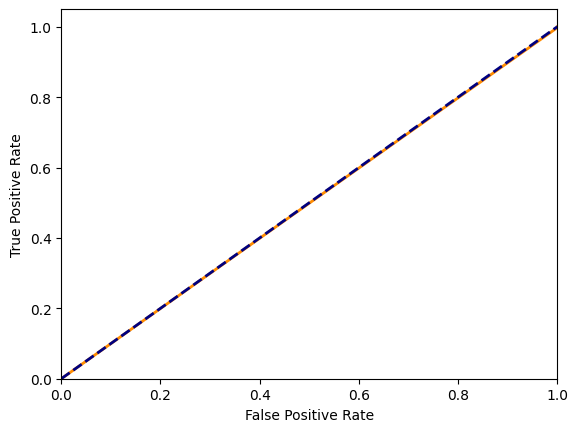

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print("Area Under Curve (AUC):", roc_auc)
print()

In [ ]:
import streamlit as st

# Assuming 'model' is already imported and is the sentiment analysis model
# from model_module import model

def predict_sentiment(text):
    # This function takes in text and returns the sentiment
    # Here you need to adapt the function depending on how your model processes the input
    # For example, it could require tokenization or specific formatting:
    prediction = model.predict([text])  # Adjust this line based on how your model expects input
    if prediction > 0.5:
        return "Positive"
    else:
        return "Negative"

# Streamlit interface
def main():
    st.title("Sentiment Analysis App")
    user_input = st.text_area("Enter Text Here:", "Type here...")
    if st.button("Analyze"):
        sentiment = predict_sentiment(user_input)
        st.write(f"Sentiment: {sentiment}")

if __name__ == '__main__':
    main()

2024-04-28 10:01:18.734 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.249.133:8501

